BUSA8001 Applied Predictive Analytics 
   
**ASSIGNMENT 2 CUSTOMER SEGMENTATION**  
  
Student Name: Minh Le Quynh Cao  
Student ID: 46822097

In [38]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("data.csv")

In [423]:
# data.head()

In [424]:
# data.info()

In [422]:
# pd.set_option('display.float_format', '{:.2f}'.format)
# data.describe()

In [425]:
# data.isnull().sum()

In [178]:
# # Heatmap between all variables.

# corr = data.corr()
# f, ax = plt.subplots(figsize=(20,10))
# ax = sns.heatmap(corr, cmap='Blues', annot=True, linewidths=.5, square=True)
# ax.xaxis.tick_top()
# plt.title('Heatmap', fontsize=20)

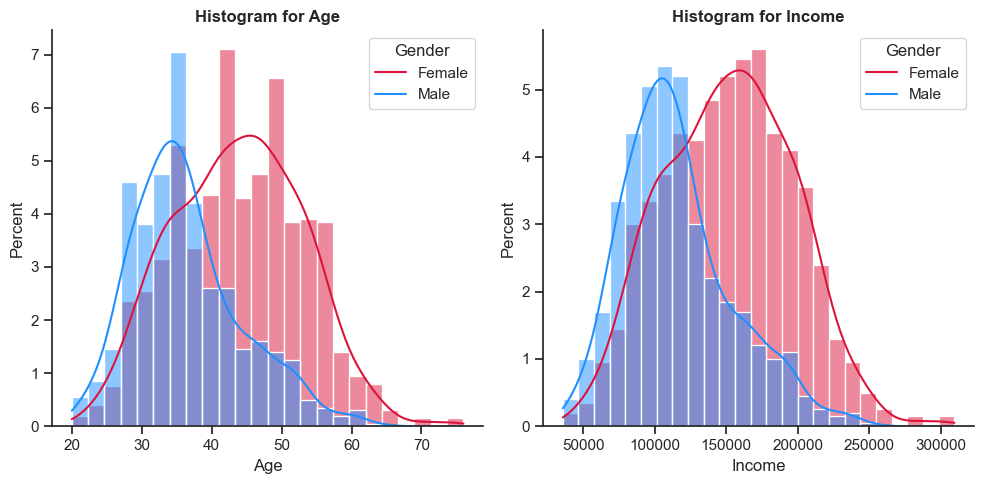

In [426]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.histplot(data=data, x='Age', stat='percent', hue='Gender', kde=True, palette={0: 'dodgerblue', 1: 'crimson'}, ax=axes[0])
axes[0].set_title('Histogram for Age', weight='bold')
axes[0].legend(title='Gender', labels=['Female', 'Male'])

sns.histplot(data=data, x='Income', stat='percent', hue='Gender', kde=True, palette={0: 'dodgerblue', 1: 'crimson'}, ax=axes[1])
axes[1].set_title('Histogram for Income', weight='bold')
axes[1].legend(title='Gender', labels=['Female', 'Male'])

plt.tight_layout()
plt.show()

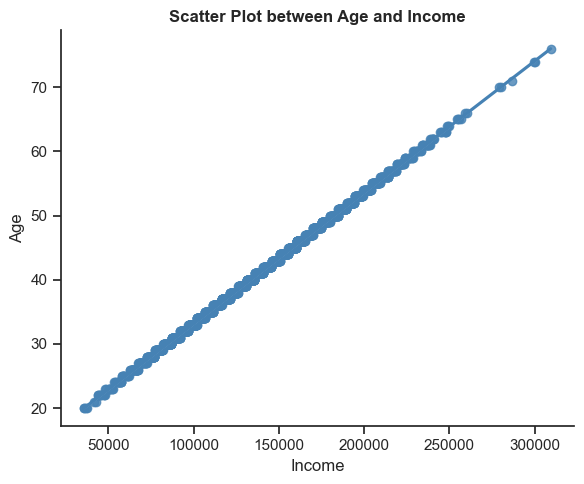

In [434]:
plt.figure(figsize=(6,5))
sns.regplot(data=data, x='Income', y='Age', scatter=True, color="steelblue")
plt.title('Scatter Plot between Age and Income', weight='bold')
plt.tight_layout()
plt.show()


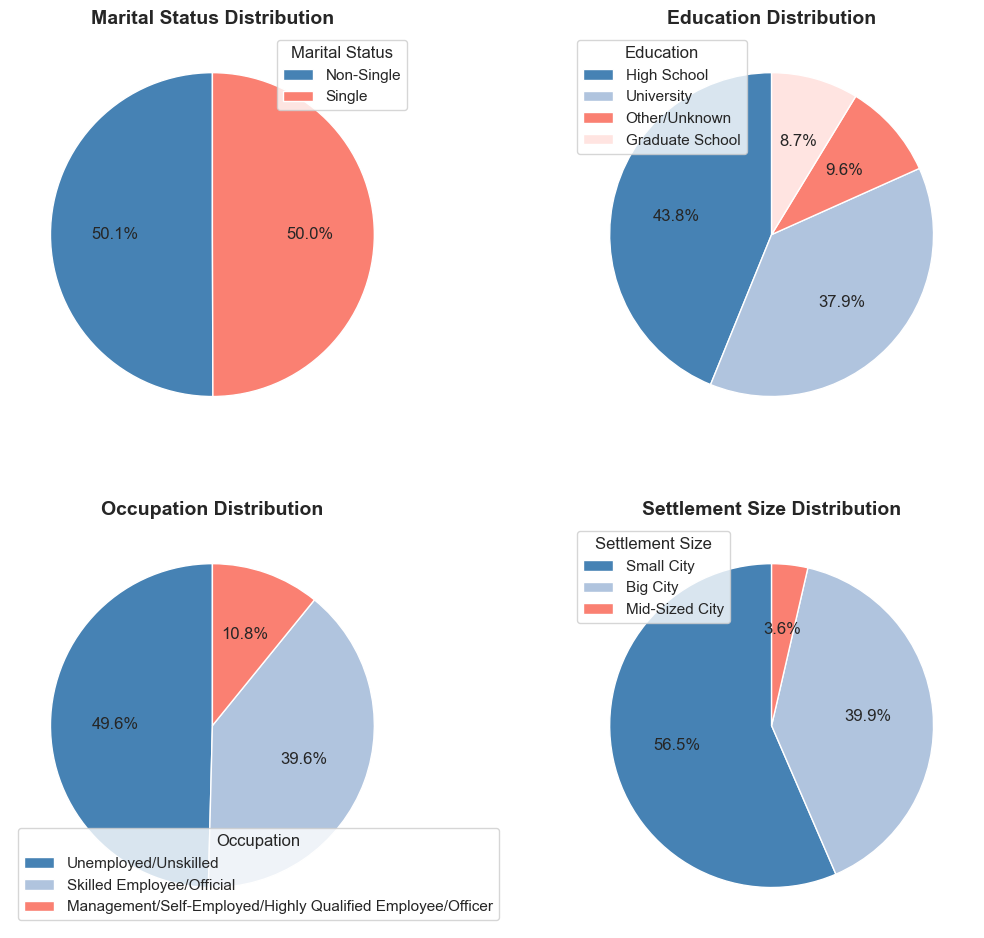

In [365]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ms_counts = data['Marital Status'].value_counts()
edu_counts = data['Education'].value_counts()
occ_counts = data['Occupation'].value_counts()
ss_counts = data['Settlement Size'].value_counts()

axes[0, 0].pie(ms_counts, autopct='%1.1f%%', startangle=90, colors=['steelblue', 'salmon'])
axes[0, 0].set_title('Marital Status Distribution', fontsize = 14, weight='bold')
axes[0, 0].legend(title='Marital Status', labels=['Non-Single', 'Single'])

axes[0, 1].pie(edu_counts, autopct='%1.1f%%', startangle=90, colors=['steelblue', 'lightsteelblue', 'salmon', 'mistyrose'])
axes[0, 1].set_title('Education Distribution', fontsize = 14, weight='bold')
axes[0, 1].legend(title='Education', labels=['High School', 'University', 'Other/Unknown', 'Graduate School'])

axes[1, 0].pie(occ_counts,autopct='%1.1f%%', startangle=90, colors=['steelblue', 'lightsteelblue', 'salmon'])
axes[1, 0].set_title('Occupation Distribution', fontsize = 14, weight='bold')
axes[1, 0].legend(title='Occupation', labels=['Unemployed/Unskilled', 'Skilled Employee/Official', 'Management/Self-Employed/Highly Qualified Employee/Officer'])

axes[1, 1].pie(ss_counts, autopct='%1.1f%%', startangle=90, colors=['steelblue', 'lightsteelblue', 'salmon'])
axes[1, 1].set_title('Settlement Size Distribution', fontsize = 14, weight='bold')
axes[1, 1].legend(title='Settlement Size', labels=['Small City', 'Big City', 'Mid-Sized City'])

plt.tight_layout()
plt.show()

In [237]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = data.iloc[:,[2, 4]].values
X_scaled = sc.fit_transform(X)

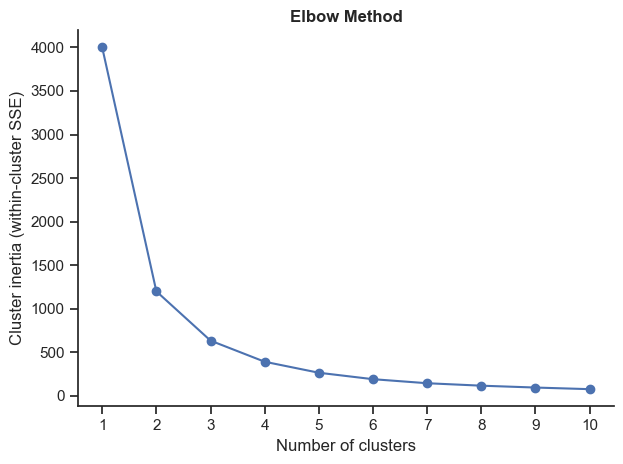

In [437]:
from sklearn.cluster import KMeans
inertias = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init = 'k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Method', weight='bold')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.tight_layout()
plt.show()

silhouette_avg: 0.60


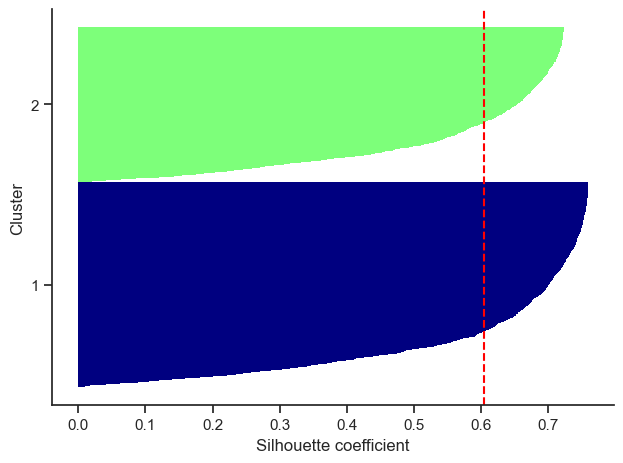

silhouette_avg: 0.55


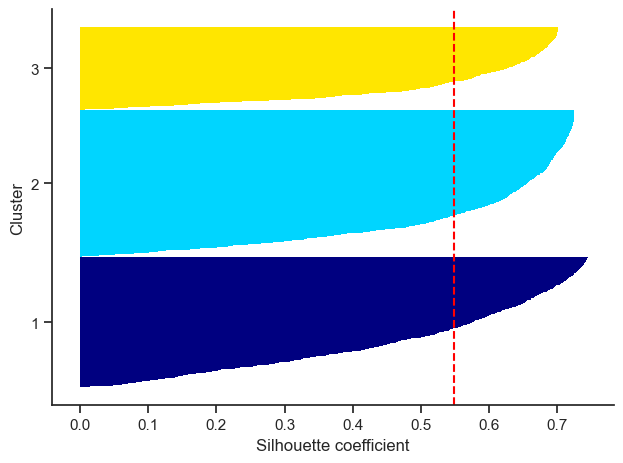

silhouette_avg: 0.53


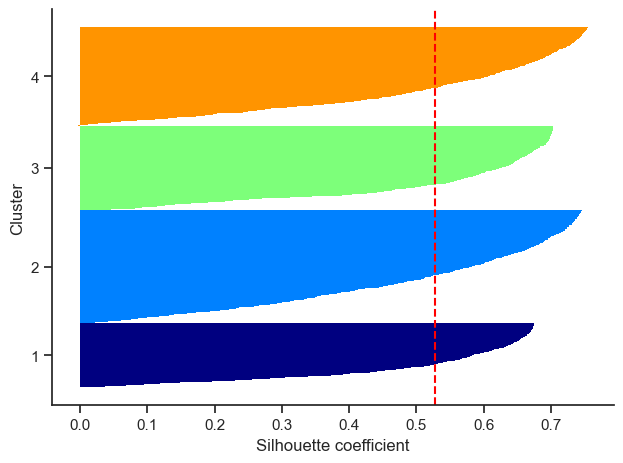

In [438]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

for n_clusters in range (2, 5): 
    km = KMeans(n_clusters=n_clusters,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

    y_km = km.fit_predict(X)

    cluster_labels = np.unique(y_km)

    n_clusters = cluster_labels.shape[0]

    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    
    
    silhouette_avg = np.mean(silhouette_vals)
    print(f'silhouette_avg: {silhouette_avg:.2f}')

    plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    #plt.savefig('images/11_04.png', dpi=300)
    plt.show()

In [439]:
km = KMeans(n_clusters=2,
            init='random',
            n_init=10,
            max_iter=300,
            random_state=0)
y_km = km.fit_predict(X_scaled)

data['kmean_cluster'] = y_km 


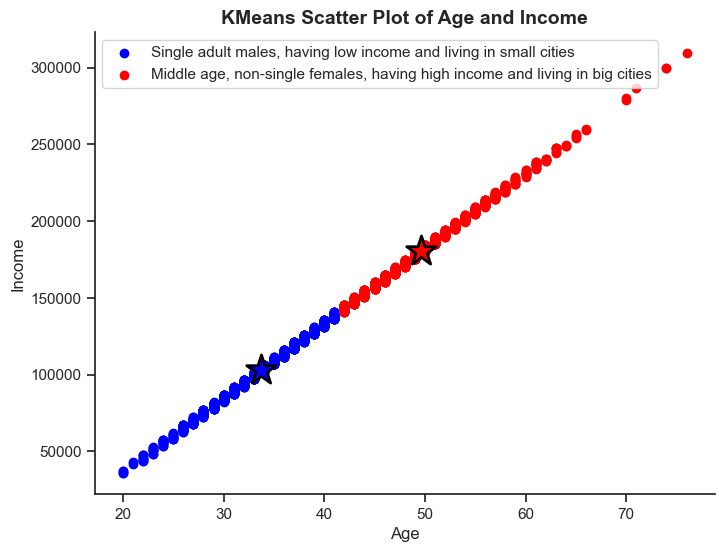

In [440]:
plt.figure(figsize=(8,6))

centroids = data.groupby('kmean_cluster').mean()
cluster_names = {0:'Middle age, non-single females, having high income and living in big cities',
                 1:'Single adult males, having low income and living in small cities'}
colors = {0:'red', 1:'blue'}
centroid_colors = {0:'red', 1:'blue'}

for cluster in data['kmean_cluster'].unique():
    plt.scatter(data[data['kmean_cluster'] == cluster]['Age'],
                data[data['kmean_cluster'] == cluster]['Income'],
                c=colors[cluster],
                label=cluster_names[cluster])

for cluster in data['kmean_cluster'].unique():
    plt.scatter(centroids.loc[cluster, 'Age'],
                centroids.loc[cluster, 'Income'],
                c=centroid_colors[cluster],
                marker='*',
                s=500,
                edgecolors='black',
                linewidths=2)


plt.title('KMeans Scatter Plot of Age and Income', fontsize = 14, weight = 'bold')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


In [441]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(data)
# data['hierarchical_cluster'] = y_ac
# data

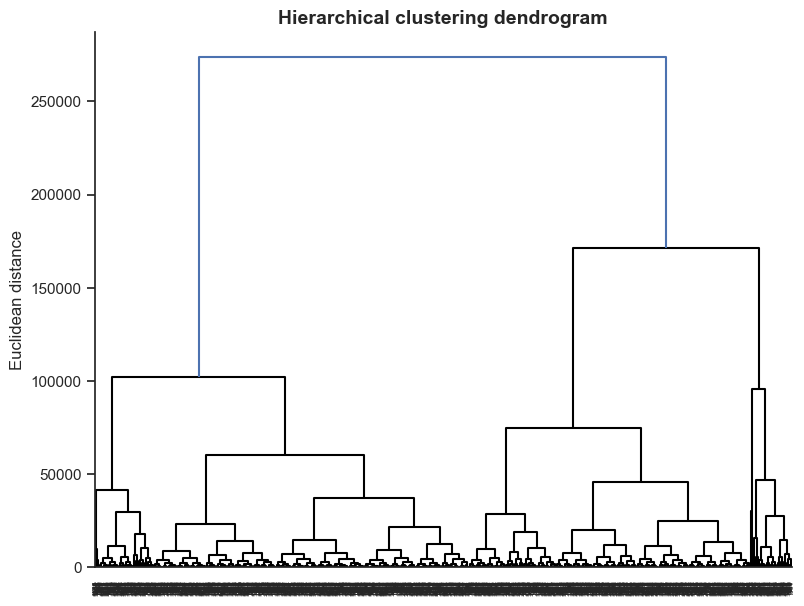

In [442]:
from scipy.cluster.hierarchy import dendrogram,set_link_color_palette

plt.figure(figsize=(8,6))

set_link_color_palette(['black'])

linked = linkage(data, method='complete', metric='euclidean')

row_dendr = dendrogram(linked)

plt.tight_layout()
plt.title('Hierarchical clustering dendrogram', fontsize = 14, weight = 'bold')
plt.ylabel('Euclidean distance')
plt.show()

In [443]:
cluster_centers = km.cluster_centers_
original_cluster_centers = sc.inverse_transform(cluster_centers)

cluster_centers_data = pd.DataFrame(original_cluster_centers, columns=['Label 1', 'Label 2'])
cluster_counts = pd.Series(y_km).value_counts().sort_index()

cluster_centers_data['Number of Customers'] = cluster_counts.values

print("K-Means Cluster Centers and Number of Customers")
print(cluster_centers_data)

K-Means Cluster Centers and Number of Customers
   Label 1   Label 2  Number of Customers
0    49.66 180663.00                  890
1    33.74 102921.02                 1110


In [444]:
cluster_centers_data_ac = pd.DataFrame(X, columns=['Label 1', 'Label 2'])
cluster_centers_data_ac['Cluster'] = y_ac

cluster_centers_ac = cluster_centers_data_ac.groupby('Cluster').mean()

cluster_counts_ac = cluster_centers_data_ac['Cluster'].value_counts().sort_index()

cluster_centers_ac['Number of Customers'] = cluster_counts_ac.values

print("Agglomerative Clustering Centers and Number of Customers")
print(cluster_centers_ac)

Agglomerative Clustering Centers and Number of Customers
         Label 1   Label 2  Number of Customers
Cluster                                        
0          49.32 179064.29                  926
1          33.50 101693.53                 1074


In [445]:
data_km1 = data[data['kmean_cluster'] == 0]
data_km2 = data[data['kmean_cluster'] == 1]
data_ac1 = data[data['hierarchical_cluster'] == 0]
data_ac2 = data[data['hierarchical_cluster'] == 1]

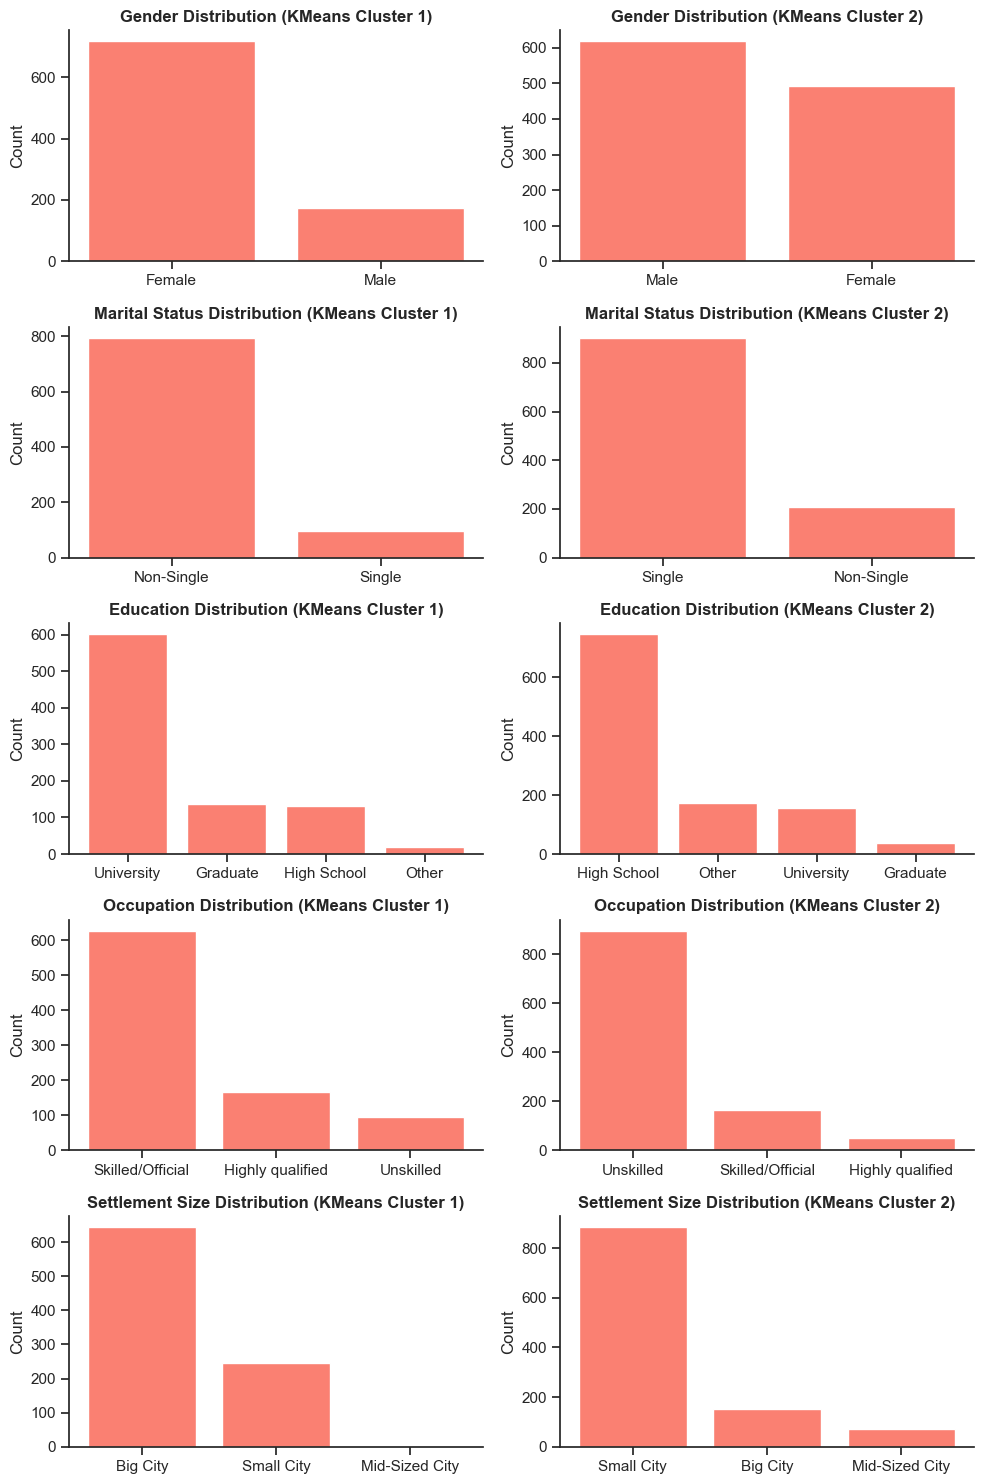

In [446]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,15))

gen_counts1 = data_km1['Gender'].value_counts()
ms_counts1 = data_km1['Marital Status'].value_counts()
edu_counts1 = data_km1['Education'].value_counts()
occ_counts1 = data_km1['Occupation'].value_counts()
ss_counts1 = data_km1['Settlement Size'].value_counts()

gen_counts2 = data_km2['Gender'].value_counts()
ms_counts2 = data_km2['Marital Status'].value_counts()
edu_counts2 = data_km2['Education'].value_counts()
occ_counts2 = data_km2['Occupation'].value_counts()
ss_counts2 = data_km2['Settlement Size'].value_counts()

gen_counts1.index = gen_counts1.index.map({0: 'Male', 1: 'Female'})
ms_counts1.index = ms_counts1.index.map({0: 'Single', 1: 'Non-Single'})
edu_counts1.index = edu_counts1.index.map({0: 'Other', 1: 'High School', 2: 'University', 3: 'Graduate'})
occ_counts1.index = occ_counts1.index.map({0: 'Unskilled', 1: 'Skilled/Official', 2: 'Highly qualified'})
ss_counts1.index = ss_counts1.index.map({0: 'Small City', 1: 'Mid-Sized City', 2: 'Big City'})

gen_counts2.index = gen_counts2.index.map({0: 'Male', 1: 'Female'})
ms_counts2.index = ms_counts2.index.map({0: 'Single', 1: 'Non-Single'})
edu_counts2.index = edu_counts2.index.map({0: 'Other', 1: 'High School', 2: 'University', 3: 'Graduate'})
occ_counts2.index = occ_counts2.index.map({0: 'Unskilled', 1: 'Skilled/Official', 2: 'Highly qualified'})
ss_counts2.index = ss_counts2.index.map({0: 'Small City', 1: 'Mid-Sized City', 2: 'Big City'})

axes[0, 0].bar(gen_counts1.index, gen_counts1.values, color='salmon')
axes[0, 0].set_title('Gender Distribution (KMeans Cluster 1)',weight='bold')
axes[0, 0].set_ylabel('Count')

axes[1, 0].bar(ms_counts1.index, ms_counts1.values, color='salmon')
axes[1, 0].set_title('Marital Status Distribution (KMeans Cluster 1)',weight='bold')
axes[1, 0].set_ylabel('Count')

axes[2, 0].bar(edu_counts1.index, edu_counts1.values, color='salmon')
axes[2, 0].set_title('Education Distribution (KMeans Cluster 1)',weight='bold')
axes[2, 0].set_ylabel('Count')

axes[3, 0].bar(occ_counts1.index, occ_counts1.values, color='salmon')
axes[3, 0].set_title('Occupation Distribution (KMeans Cluster 1)',weight='bold')
axes[3, 0].set_ylabel('Count')

axes[4, 0].bar(ss_counts1.index, ss_counts1.values, color='salmon')
axes[4, 0].set_title('Settlement Size Distribution (KMeans Cluster 1)',weight='bold')
axes[4, 0].set_ylabel('Count')

axes[0, 1].bar(gen_counts2.index, gen_counts2.values, color='salmon')
axes[0, 1].set_title('Gender Distribution (KMeans Cluster 2)',weight='bold')
axes[0, 1].set_ylabel('Count')

axes[1, 1].bar(ms_counts2.index, ms_counts2.values, color='salmon')
axes[1, 1].set_title('Marital Status Distribution (KMeans Cluster 2)',weight='bold')
axes[1, 1].set_ylabel('Count')

axes[2, 1].bar(edu_counts2.index, edu_counts2.values, color='salmon')
axes[2, 1].set_title('Education Distribution (KMeans Cluster 2)',weight='bold')
axes[2, 1].set_ylabel('Count')

axes[3, 1].bar(occ_counts2.index, occ_counts2.values, color='salmon')
axes[3, 1].set_title('Occupation Distribution (KMeans Cluster 2)',weight='bold')
axes[3, 1].set_ylabel('Count')

axes[4, 1].bar(ss_counts2.index, ss_counts2.values, color='salmon')
axes[4, 1].set_title('Settlement Size Distribution (KMeans Cluster 2)',weight='bold')
axes[4, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

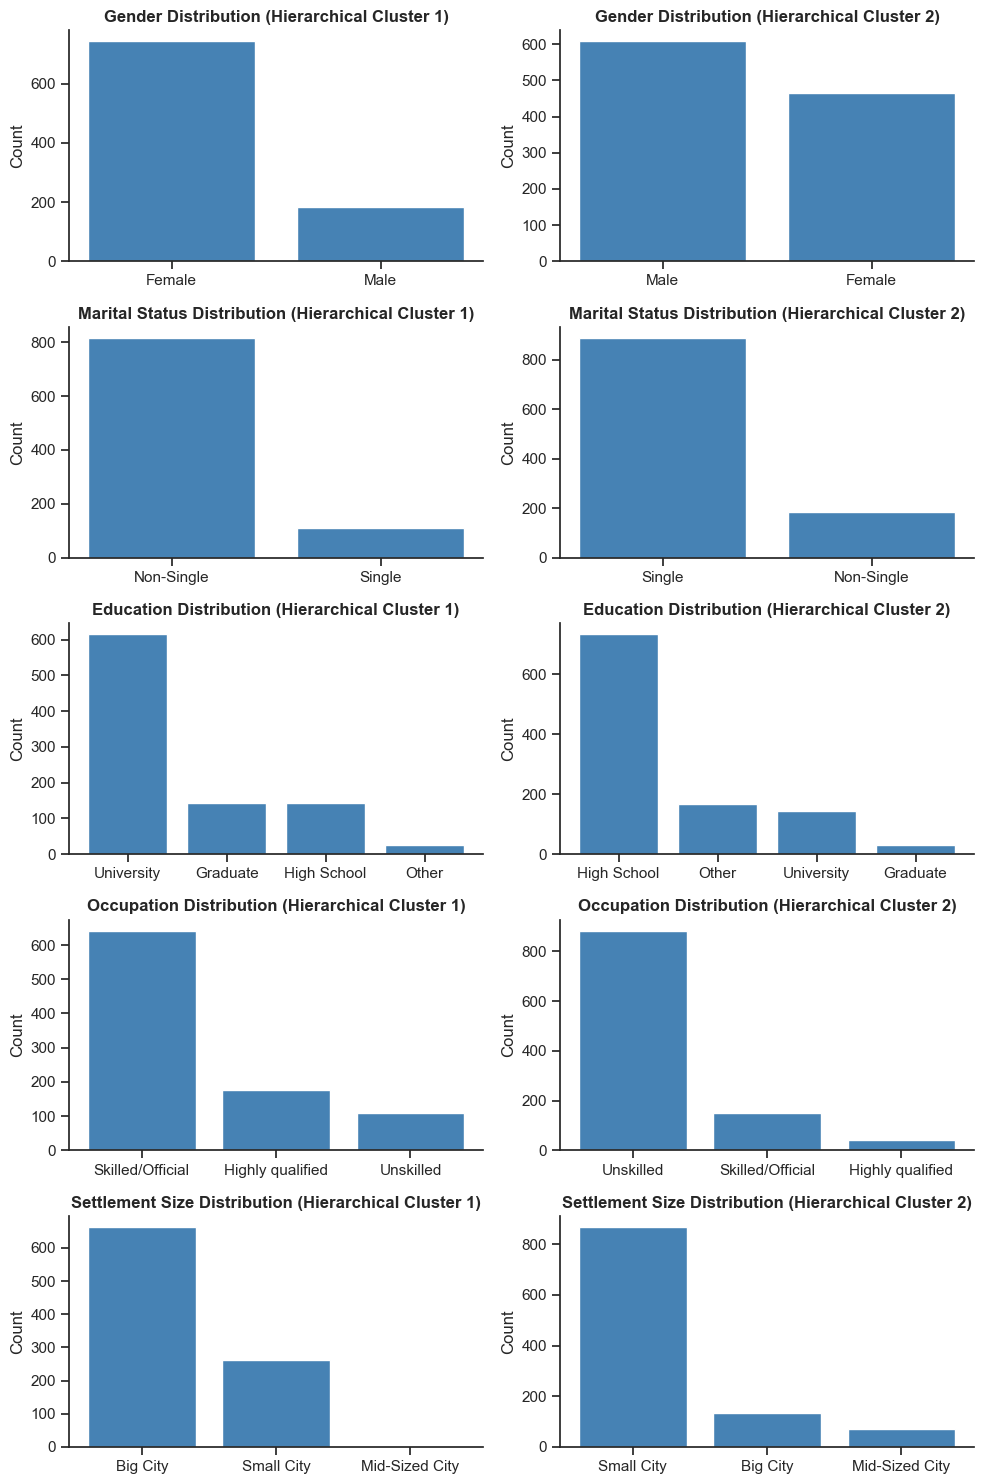

In [413]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,15))

gen_counts1ac = data_ac1['Gender'].value_counts()
ms_counts1ac = data_ac1['Marital Status'].value_counts()
edu_counts1ac = data_ac1['Education'].value_counts()
occ_counts1ac = data_ac1['Occupation'].value_counts()
ss_counts1ac = data_ac1['Settlement Size'].value_counts()

gen_counts2ac = data_ac2['Gender'].value_counts()
ms_counts2ac = data_ac2['Marital Status'].value_counts()
edu_counts2ac = data_ac2['Education'].value_counts()
occ_counts2ac = data_ac2['Occupation'].value_counts()
ss_counts2ac = data_ac2['Settlement Size'].value_counts()

gen_counts1ac.index = gen_counts1ac.index.map({0: 'Male', 1: 'Female'})
ms_counts1ac.index = ms_counts1ac.index.map({0: 'Single', 1: 'Non-Single'})
edu_counts1ac.index = edu_counts1ac.index.map({0: 'Other', 1: 'High School', 2: 'University', 3: 'Graduate'})
occ_counts1ac.index = occ_counts1ac.index.map({0: 'Unskilled', 1: 'Skilled/Official', 2: 'Highly qualified'})
ss_counts1ac.index = ss_counts1ac.index.map({0: 'Small City', 1: 'Mid-Sized City', 2: 'Big City'})

gen_counts2ac.index = gen_counts2ac.index.map({0: 'Male', 1: 'Female'})
ms_counts2ac.index = ms_counts2ac.index.map({0: 'Single', 1: 'Non-Single'})
edu_counts2ac.index = edu_counts2ac.index.map({0: 'Other', 1: 'High School', 2: 'University', 3: 'Graduate'})
occ_counts2ac.index = occ_counts2ac.index.map({0: 'Unskilled', 1: 'Skilled/Official', 2: 'Highly qualified'})
ss_counts2ac.index = ss_counts2ac.index.map({0: 'Small City', 1: 'Mid-Sized City', 2: 'Big City'})

axes[0, 0].bar(gen_counts1ac.index, gen_counts1ac.values, color='steelblue')
axes[0, 0].set_title('Gender Distribution (Hierarchical Cluster 1)',weight='bold')
axes[0, 0].set_ylabel('Count')

axes[1, 0].bar(ms_counts1ac.index, ms_counts1ac.values, color='steelblue')
axes[1, 0].set_title('Marital Status Distribution (Hierarchical Cluster 1)',weight='bold')
axes[1, 0].set_ylabel('Count')

axes[2, 0].bar(edu_counts1ac.index, edu_counts1ac.values, color='steelblue')
axes[2, 0].set_title('Education Distribution (Hierarchical Cluster 1)',weight='bold')
axes[2, 0].set_ylabel('Count')

axes[3, 0].bar(occ_counts1ac.index, occ_counts1ac.values, color='steelblue')
axes[3, 0].set_title('Occupation Distribution (Hierarchical Cluster 1)',weight='bold')
axes[3, 0].set_ylabel('Count')

axes[4, 0].bar(ss_counts1ac.index, ss_counts1ac.values, color='steelblue')
axes[4, 0].set_title('Settlement Size Distribution (Hierarchical Cluster 1)',weight='bold')
axes[4, 0].set_ylabel('Count')

axes[0, 1].bar(gen_counts2ac.index, gen_counts2ac.values, color='steelblue')
axes[0, 1].set_title('Gender Distribution (Hierarchical Cluster 2)',weight='bold')
axes[0, 1].set_ylabel('Count')

axes[1, 1].bar(ms_counts2ac.index, ms_counts2ac.values, color='steelblue')
axes[1, 1].set_title('Marital Status Distribution (Hierarchical Cluster 2)',weight='bold')
axes[1, 1].set_ylabel('Count')

axes[2, 1].bar(edu_counts2ac.index, edu_counts2ac.values, color='steelblue')
axes[2, 1].set_title('Education Distribution (Hierarchical Cluster 2)',weight='bold')
axes[2, 1].set_ylabel('Count')

axes[3, 1].bar(occ_counts2ac.index, occ_counts2ac.values, color='steelblue')
axes[3, 1].set_title('Occupation Distribution (Hierarchical Cluster 2)',weight='bold')
axes[3, 1].set_ylabel('Count')

axes[4, 1].bar(ss_counts2ac.index, ss_counts2ac.values, color='steelblue')
axes[4, 1].set_title('Settlement Size Distribution (Hierarchical Cluster 2)',weight='bold')
axes[4, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

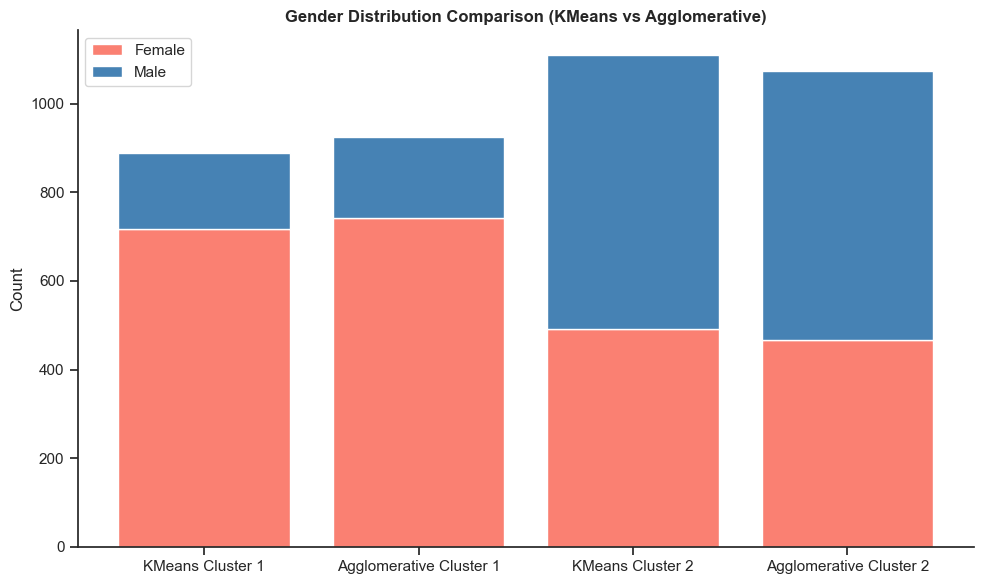

In [447]:
labels = ['KMeans Cluster 1', 'Agglomerative Cluster 1', 'KMeans Cluster 2', 'Agglomerative Cluster 2']

female_counts = [gen_counts1[0], gen_counts1ac[0], gen_counts2[1], gen_counts2ac[1]]
male_counts = [gen_counts1[1], gen_counts1ac[1], gen_counts2[0], gen_counts2ac[0]]

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x, female_counts, label='Female', color='salmon')
ax.bar(x, male_counts, bottom=female_counts, label='Male', color='steelblue')

ax.set_ylabel('Count')
ax.set_title('Gender Distribution Comparison (KMeans vs Agglomerative)', weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

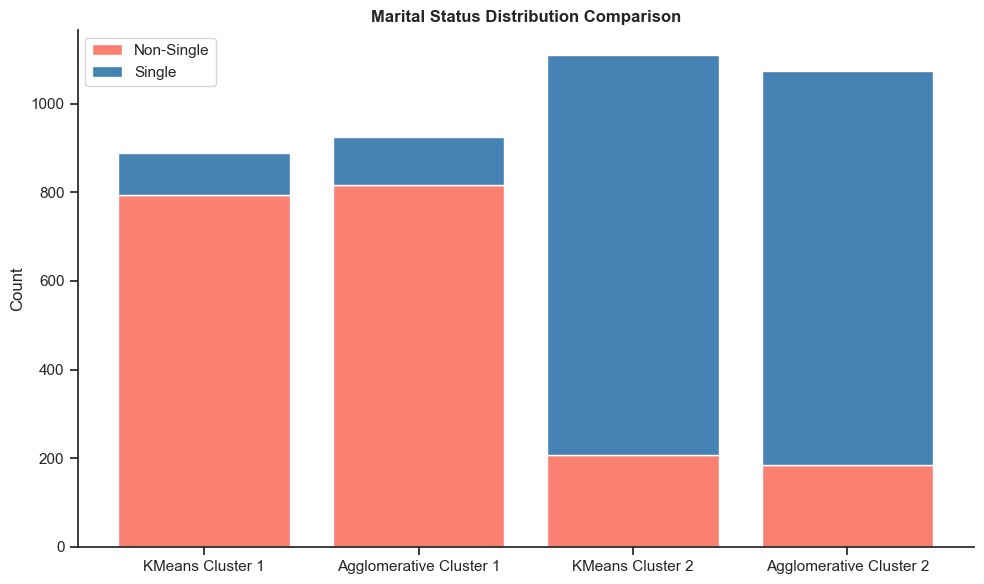

In [421]:
labels = ['KMeans Cluster 1', 'Agglomerative Cluster 1', 'KMeans Cluster 2', 'Agglomerative Cluster 2']

non_single_counts = [ms_counts1[0], ms_counts1ac[0], ms_counts2[1], ms_counts2ac[1]]
single_counts = [ms_counts1[1], ms_counts1ac[1], ms_counts2[0], ms_counts2ac[0]]

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x, non_single_counts, label='Non-Single', color='salmon')
ax.bar(x, single_counts, bottom=non_single_counts, label='Single', color='steelblue')

ax.set_ylabel('Count')
ax.set_title('Marital Status Distribution Comparison', weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

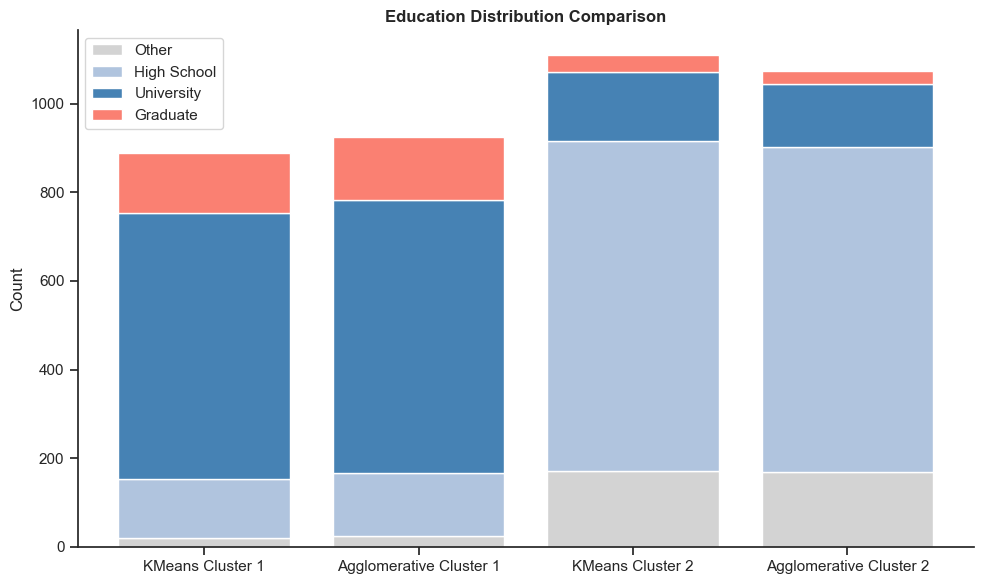

In [420]:
labels = ['KMeans Cluster 1', 'Agglomerative Cluster 1', 'KMeans Cluster 2', 'Agglomerative Cluster 2']

other_counts = [edu_counts1[3], edu_counts1ac[3], edu_counts2[1], edu_counts2ac[1]]  
highschool_counts = [edu_counts1[2], edu_counts1ac[2], edu_counts2[0], edu_counts2ac[0]]  
university_counts = [edu_counts1[0], edu_counts1ac[0], edu_counts2[2], edu_counts2ac[2]] 
graduate_counts = [edu_counts1[1], edu_counts1ac[1], edu_counts2[3], edu_counts2ac[3]] 

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, other_counts, label='Other', color='lightgrey')
ax.bar(x, highschool_counts, bottom=other_counts, label='High School', color='lightsteelblue')
ax.bar(x, university_counts, bottom=np.add(other_counts, highschool_counts), label='University', color='steelblue')
ax.bar(x, graduate_counts, bottom=np.add(np.add(other_counts, highschool_counts), university_counts), label='Graduate', color='salmon')

ax.set_ylabel('Count')
ax.set_title('Education Distribution Comparison', weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


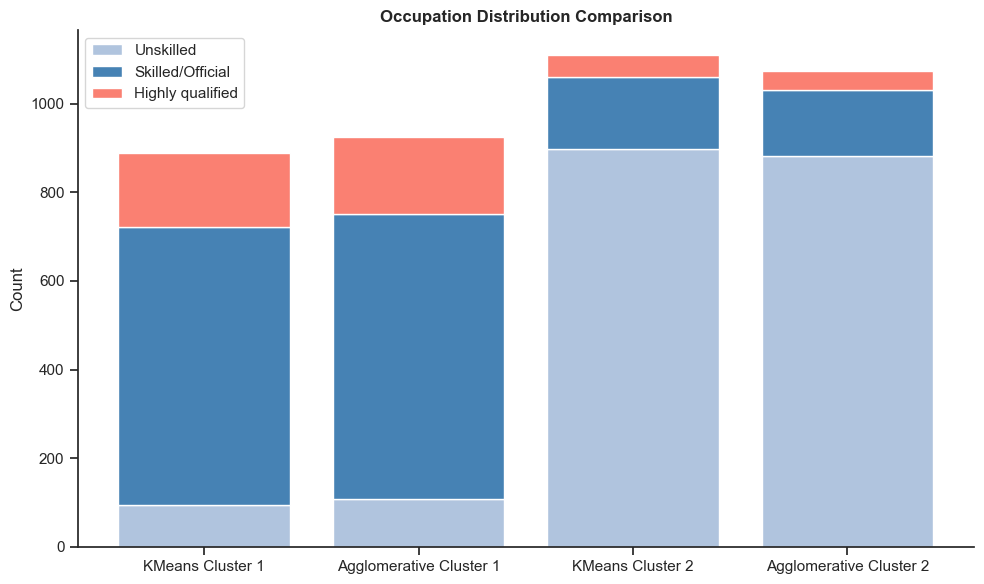

In [415]:
labels = ['KMeans Cluster 1', 'Agglomerative Cluster 1', 'KMeans Cluster 2', 'Agglomerative Cluster 2']

unskilled_counts_occ = [occ_counts1[2], occ_counts1ac[2], occ_counts2[0], occ_counts2ac[0]]  
skilled_counts_occ = [occ_counts1[0], occ_counts1ac[0], occ_counts2[1], occ_counts2ac[1]]  
highqualified_counts_occ = [occ_counts1[1], occ_counts1ac[1], occ_counts2[2], occ_counts2ac[2]]  

# # Counts for Settlement Size categories
# small_city_counts_ss = [ss_counts1[0], ss_counts1ac[0], ss_counts2[0], ss_counts2ac[0]]  # 'Small City'
# mid_city_counts_ss = [ss_counts1[1], ss_counts1ac[1], ss_counts2[1], ss_counts2ac[1]]  # 'Mid-Sized City'
# big_city_counts_ss = [ss_counts1[2], ss_counts1ac[2], ss_counts2[2], ss_counts2ac[2]]  # 'Big City'

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, unskilled_counts_occ, label='Unskilled', color='lightsteelblue')
ax.bar(x, skilled_counts_occ, bottom=unskilled_counts_occ, label='Skilled/Official', color='steelblue')
ax.bar(x, highqualified_counts_occ, bottom=np.add(unskilled_counts_occ, skilled_counts_occ), label='Highly qualified', color='salmon')

# Add labels for Occupation
ax.set_ylabel('Count')
ax.set_title('Occupation Distribution Comparison', weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.tight_layout()
plt.show()


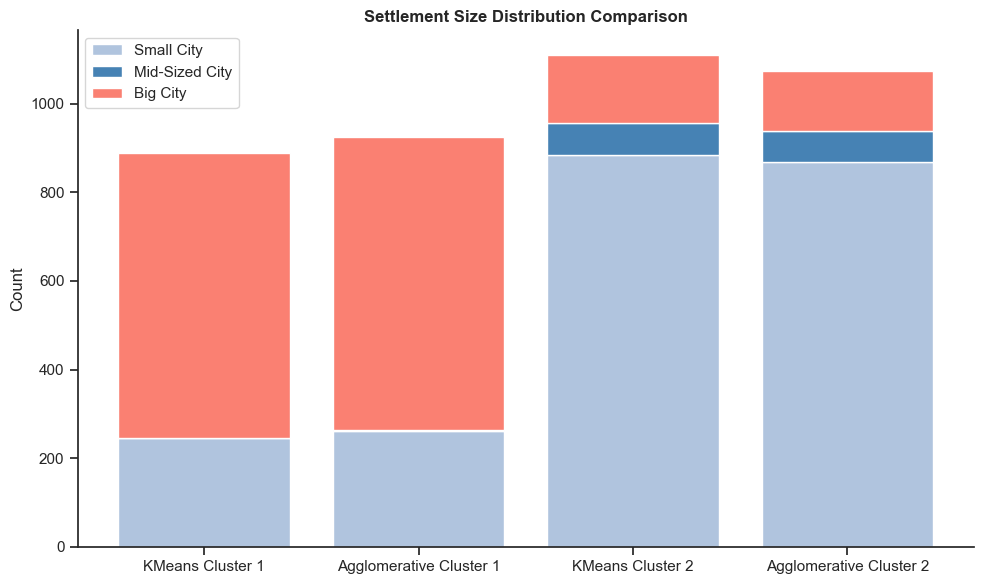

In [419]:
labels = ['KMeans Cluster 1', 'Agglomerative Cluster 1', 'KMeans Cluster 2', 'Agglomerative Cluster 2']

small_city_counts_ss = [ss_counts1[1], ss_counts1ac[1], ss_counts2[0], ss_counts2ac[0]] 
mid_city_counts_ss = [ss_counts1[2], ss_counts1ac[2], ss_counts2[2], ss_counts2ac[2]]  
big_city_counts_ss = [ss_counts1[0], ss_counts1ac[0], ss_counts2[1], ss_counts2ac[1]] 

fig, ax = plt.subplots(figsize=(10, 6))


ax.bar(x, small_city_counts_ss, label='Small City', color='lightsteelblue')
ax.bar(x, mid_city_counts_ss, bottom=small_city_counts_ss, label='Mid-Sized City', color='steelblue')
ax.bar(x, big_city_counts_ss, bottom=np.add(small_city_counts_ss, mid_city_counts_ss), label='Big City', color='salmon')

ax.set_ylabel('Count')
ax.set_title('Settlement Size Distribution Comparison', weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()
